## Gene locus summary
Author: Alexandre Pelletier and Jenny Empawi

### Motivation
Create an information visualization summarizing key information from the comprehensive AD loci table.

### Implementation
Generate one figure to highlight the most critical insights from the AD loci table. Possible information to include: effect size direction for AD risk variants wrt xQTL

#### Required Files
* xQTL_all_methods_overlap_with_AD_loci_unified_cs95orColocs_Pval1e5.csv.gz which was generated in step III from this [script](https://github.com/StatFunGen/xqtl-paper/blob/main/main_text/5_AD_xQTL_genes_cis_trans/staging/gene_priorization_table/complete_ADlocus_level_summary.R)
In this table, each row is a variant-ADlocus-Method-context-gene_name information, and so facilitate querying informations.

* [gene_prio_utils](https://github.com/StatFunGen/xqtl-paper/blob/main/main_text/5_AD_xQTL_genes_cis_trans/staging/gene_priorization_table/gene_prio_utils.R)

* AD_loci_unified_cs95orColocs.csv.gz

* gwas_n_cases_control.tsv

#### Load libraries

In [1]:
library(ggtext)
library(patchwork)

#### Set working directory and output directory

In [2]:
setwd('/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_6') # set your working directory
source('/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_6/gene_prio_utils.R') 
out<-'/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_6' #set your output directory
dir.create(out) 

28 threads available for data.table

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purrr::transpose()   masks data.table::transpose()
✖ lubridate::wday()    

In [3]:
# update table figure
res_adx<-fread(fp(out,'xQTL_all_methods_overlap_with_AD_loci_unified_cs95orColocs_Pval1e5.csv.gz'))
res_adx<-res_adx[Method!='trans_finemapping']

# add the confidence level
res_adx[,top_confidence:=str_extract(xQTL_effects,'CL[0-9]')]

# xQTL evidence summary dot plot at locus level
# for each QTL evidence type put in 3 cat : absent, present, high, 
# for fp: high if cs95, coloc : high if npc > 0.95, TWAS: MR
table(res_adx$Method)
table(res_adx$context_short)
table(res_adx$context)


       AD_GWAS_finemapping     AD_meta_colocalization 
                      6552                       7825 
    AD_xQTL_colocalization           APOE interaction 
                    142480                       2900 
                     Coloc                         QR 
                     18653                     236849 
                   TWAS/MR                      cTWAS 
                      2689                        118 
        fSuSiE_finemapping           msex interaction 
                     14878                         23 
 multi_context_finemapping     multi_gene_finemapping 
                    106658                      70541 
single_context_finemapping                    sn_sQTL 
                   1513680                     233527 


              Ast caQTL    Ast eQTL    Ast sQTL           B    Exc eQTL 
      17708           6      117630       13522       10551      141464 
   Exc sQTL    Inh eQTL    Inh sQTL           J           K   Mic caQTL 
     166055      144615       25078         672        1118          12 
   Mic eQTL    Mic sQTL    OPC eQTL    OPC sQTL    Oli eQTL    Oli sQTL 
      58478           2       84874        8960      140034       19910 
          W   bMac eQTL   bMic eQTL  bMono eQTL   bulk eQTL  bulk gpQTL 
      40897       51782       48336       23204      831822        3689 
 bulk haQTL   bulk mQTL bulk p-sQTL   bulk pQTL   bulk sQTL bulk u-sQTL 
        212       15593      178094       17409      167790       27856 


                                                                AC_DeJager_eQTL 
                                  17708                                  133098 
                     AD_Bellenguez_2022                 AD_Bellenguez_EADB_2022 
                                   8517                                    2017 
                AD_Bellenguez_EADI_2022                          AD_Jansen_2021 
                                     17                                     672 
                  AD_Kunkle_Stage1_2019       AD_Wightman_Excluding23andMe_2021 
                                   1118                                   22223 
AD_Wightman_ExcludingUKBand23andME_2021                   AD_Wightman_Full_2021 
                                  15493                                    3181 
                     Ast_10_Kellis_eQTL                        Ast_DeJager_eQTL 
                                  21100                                   64941 
                        Ast

In [4]:
# group contexts better: 
res_adx[,locus_gene:=paste(locus_index,ifelse(gene_name=='','?',gene_name),sep='_')]

# annot
res_adx[,genomewide_sig_gene:=any(min_pval<5e-8,na.rm = T),by='gene_name']

res_adx[,n_gwas_gene:=strsplit(gwas_sources,'\\|')|>unlist()|>unique()|>length(),by=.(gene_name)]
res_adx[,n_gwas_locus:=strsplit(gwas_sources,'\\|')|>unlist()|>unique()|>length(),by=.(locus_index)]

# get at locus level and cis information only
res_adxloc<-unique(res_adx[Method!='trans_finemapping'][!context_short%in%c('B','J','K','W')][order(locus_gene,confidence_lvl,cV2F_rank)],by=c('locus_gene','context'))

# top gene per locus
res_adxloc[gene_name!='',n.study.gene.locus:=length(unique(context)),by=.(gene_name,locus_index)]

res_adxloc[gene_name!='',top_gene:=gene_name==gene_name[order(confidence_lvl,-n.study.gene.locus,cV2F_rank)][1],by=.(locus_index)]
res_adxloc[gene_name!='',top_genes:=gene_name%in%gene_name[confidence_lvl%in%sort(confidence_lvl)[1]],by=.(locus_index)]

res_adxloc[chr==16][gene_name!='',gene_name[order(confidence_lvl,-n.study.gene.locus,cV2F_rank)][1:2],by=.(locus_index)][1:100]|>unique()

res_adxloc[gene_name=='YPEL3']$locus_index
res_adxloc[locus_index==134][(top_genes)]$gene_name|>unique()
res_adx[locus_index==134&gene_name=='INO80E'&Method=='single_context_finemapping'&context_short=='Ast eQTL'&str_detect(locuscontext_id,'cs70')]$susie_coverage

res_adxlocge<-res_adxloc[context_short!=''][order(locus_index,cV2F_rank)][(top_genes)]
unique(res_adxlocge$locus_index)|>length() #177
unique(res_adxlocge$gene_name)|>length()#167

locus_index,V1
<int>,<chr>
124,KNOP1
125,CBFB
125,ACD
128,MAF
129,PLCG2
130,BCO1
130,DNAAF1
132,PLCG2
132,NA


[1] 134 134 134 134 134 134 134 134 134 134 134 134 134 134 134 134 134 134 134
[20] 134 134 134 134 134 134 134 134 134 134

[1] "DOC2A"  "INO80E" "YPEL3"

[1] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
 [11] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
 [21] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
 [31] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
 [41] ""     ""     ""     ""     ""     ""     ""     ""     "cs70" "cs70"
 [51] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
 [61] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
 [71] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
 [81] ""     ""     ""     ""     ""     ""     ""     ""     ""     ""    
 [91] ""     ""     ""     ""     ""     ""     ""     ""     ""     ""    
[101] ""     ""     ""     ""     "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
[111] "cs70" "cs70" ""     ""     ""     ""     "cs70" "cs70" "cs70" "cs70"
[121] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" ""     ""    
[131] ""     ""     "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
[141] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
[151] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" ""     ""     ""     ""    
[161] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
[171] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
[181] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
[191] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
[201] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
[211] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70"
[221] "cs70" "cs70" "cs70" "cs70" ""     ""     ""     ""     ""     ""    
[231] ""     ""     ""     ""     ""     ""     ""     ""     ""     ""    
[241] "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" "cs70" ""     ""    
[251] ""     ""     "cs70" "cs70" "cs70" "cs70"

[1] 177

[1] 283

In [5]:
# group some contexts
res_adxlocge[,context_group:=ifelse(context_short%in%c('bMono eQTL','bMac eQTL','bMic eQTL'),'Immune eQTL',
                                     ifelse(context_short%in%c( 'bulk p-sQTL','bulk u-sQTL','bulk a-sQTL'),'bulk sQTL',
                                            ifelse(context_short%in%c('bulk pQTL','bulk gpQTL'),'bulk (g)pQTL',
                                                   ifelse(context_short%in%c('bulk haQTL','bulk mQTL'),'bulk epiQTL',as.character(context_short)))))]


unique(res_adxlocge$context_group)

unique(res_adxlocge[order(confidence_lvl)],by='gene_name')$confidence_lvl|>table()


# summarize using confidence score  and nstudy
res_adxlocge[,n_study_group:=length(unique(context)),by=.(gene_name,context_group)]
res_adxlocge[,confidence_lvl_group:=sort(confidence_lvl)[1],by=.(gene_name,context_group)]
table(res_adxlocge$confidence_lvl_group)
res_adxlocge[,n_loci_gene:=unique(locus_index)|>length(),by=.(gene_name)]
res_adxlocge[,chr:=seqid(variant_ID[!is.na(variant_ID)][1],only_num = T),by=.(locus_index)]
res_adxlocge[is.na(chr),chr:=`#chr`]
table(res_adxlocge$confidence_lvl_group)


res_adxlocge[,n_study_group.locus:=length(unique(context)),by=.(gene_name,locus_index,context_group)]
res_adxlocge[,confidence_lvl_group.locus:=sort(confidence_lvl)[1],by=.(gene_name,locus_index,context_group)]

res_adxlocge[is.na(APOE_region),APOE_region:=FALSE]

res_adxlocge[,APOE_region.gene:=any(APOE_region),by='gene_name']

[1] "bulk eQTL"    "Immune eQTL"  "Ast eQTL"     "bulk sQTL"    "Exc eQTL"    
 [6] "Oli eQTL"     "Oli sQTL"     "bulk epiQTL"  "Inh eQTL"     "OPC eQTL"    
[11] "Exc sQTL"     "Mic eQTL"     "bulk (g)pQTL" "Inh sQTL"     "Ast sQTL"    
[16] "OPC sQTL"     "Mic caQTL"    "Ast caQTL"


CL1 CL2 CL3 CL4 CL5 CL6 
 22  22  17  18 197   7 


CL1 CL2 CL3 CL4 CL5 CL6 
177 140 229  99 996 147 

Warning message in `[.data.table`(res_adxlocge, is.na(chr), `:=`(chr, `#chr`)):
“Coercing 'character' RHS to 'integer' to match the type of column 155 named 'chr'.”



CL1 CL2 CL3 CL4 CL5 CL6 
177 140 229  99 996 147 

In [6]:
#genome wide signifcant htis####
contexts_order<-c('Exc eQTL','Exc sQTL',
                  'Inh eQTL','Inh sQTL',
                  'Oli eQTL','Oli sQTL',
                  'OPC eQTL','OPC sQTL',
                  'Ast eQTL','Ast caQTL','Ast sQTL',
                  'Mic eQTL','Mic caQTL',
                  'Immune eQTL',
                  'bulk eQTL',
                  'bulk sQTL',
                  'bulk (g)pQTL',
                  'bulk epiQTL')
setdiff(res_adxlocge$context_group,contexts_order)
res_adxlocge[,context_group:=factor(context_group,levels = contexts_order)]


res_adxlocgef<-res_adxlocge[(genomewide_sig_gene)]

unique(res_adxlocgef$locus_index)|>length() #98
unique(res_adxlocgef$gene_name)|>length()#79> 116

unique(res_adxlocgef$locus_gene)|>length()#98> 138
unique(res_adxlocgef[!(APOE_region.gene)]$locus_gene)|>length()#86>122


# extract each locus
res_adxlocge_cont_top<-unique(res_adxlocgef,by=c('gene_name','context_group','locus_index'))[gene_name%in%gene_name[confidence_lvl_group.locus%in%c('CL1','CL2','CL3','CL4','CL5')]]

character(0)

[1] 98

[1] 116

[1] 138

[1] 122

In [7]:
#sep causal vs correlated and remove all C6
#C6 is dropped
res_adxlocge_cont_topf<-res_adxlocge_cont_top[confidence_lvl_group.locus!='CL6']
#sep in 3categories
res_adxlocge_cont_topf[,confidence_cat_group:=ifelse(confidence_lvl_group.locus%in%c('CL1',"CL2"),'Putative causal (CL1, CL2)',ifelse(confidence_lvl_group.locus=='CL3','Putative causal (CL3)','Associated (CL4, CL5)'))]
res_adxlocge_cont_topf[,confidence_cat_group:=factor(confidence_cat_group,levels = c('Putative causal (CL1, CL2)','Putative causal (CL3)','Associated (CL4, CL5)'))]

In [8]:
#add GWAS signals
res_ad<-fread(fp(out,'AD_loci_unified_cs95orColocs.csv.gz'))
res_ad<-merge(res_ad,unique(res_adx[,.(locus_index,ADlocusID)]))

res_ad[,gwas_pvalue:=getPval(gwas_zscore)]

res_adxlocge_gwas<-unique(res_ad[order(gwas_pvalue)][gwas_source!=''],by=c('locus_index','gwas_source'))
res_adxlocge_gwas[,chr:=str_extract(chr,'[0-9]+')|>as.numeric()]

res_adxlocge_gwas[,gwas_pvalue10:=ifelse(gwas_pvalue>1e-10,gwas_pvalue,1e-10)]
res_adxlocge_gwas[,gwas_sig:=ifelse(gwas_pvalue<5e-8,'p<5e-8',ifelse(gwas_pvalue<1e-6,'p<1e-6',ifelse(gwas_pvalue<1e-5,'p<1e-5',
                                                                                                      'p>1e-5 but coloc')))]
res_adxlocge_gwas[is.na(gwas_sig),gwas_sig:='p>1e-5 but coloc']
res_adxlocge_gwas[,gwas_sig:=factor(gwas_sig,levels=c('p>1e-5 but coloc','p<1e-5','p<1e-6','p<5e-8'))]


res_adxlocge_gwas[,gwas_short:=str_extract(gwas_source,'Bellenguez|Jansen|Kunkle|Wightman')]
table(res_adxlocge_gwas$gwas_short)
res_adxlocge_gwas[str_detect(gwas_source,'EADB|EADI|UKB|23andMe'),gwas_short:=paste(gwas_short,str_extract(gwas_source,'EADB|EADI|UKB|23andMe'),sep='_')]
res_adxlocge_gwas[gwas_short=='Wightman_23andMe',gwas_short:='Wightman_no23andMe']
res_adxlocge_gwas[gwas_short=='Wightman_UKB',gwas_short:='Wightman_no23AndUKB']



Bellenguez     Jansen     Kunkle   Wightman 
       180         36         42        211 

In [9]:
#order by n AD cases (non AD by proxi first) 
res_adxlocge_gwas[,ad_by_proxi:=!gwas_source%in%c('AD_Bellenguez_EADB_2022','AD_Bellenguez_EADI_2022',
                                          'AD_Wightman_ExcludingUKBand23andME_2021',
                                          'AD_Kunkle_Stage1_2019'),by='locus_index']

gwmt<-fread('/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_6/gwas_n_cases_control.tsv')  #FIXME
res_adxlocge_gwas<-merge(res_adxlocge_gwas,gwmt[,.(gwas_source=study_id,n_case,n_control)])



#bold if not from  AD by proxy 
res_adxlocge_gwas[,gwas_short2:=ifelse(!ad_by_proxi,paste0("<b>",gwas_short,'</b>'),
                                            gwas_short)]

res_adxlocge_gwas[,gwas_short2:=factor(gwas_short2,levels = unique(gwas_short2[order(ad_by_proxi,-n_case)]))]
levels(res_adxlocge_gwas$gwas_short2)



#annot genes
res_adxlocge_cont_topf[,locus_gene_2:=paste(gene_name,match(locus_gene,
                                                            unique(locus_gene[order(chr,tss,min_pval)])),sep='_'),
                       by=.(gene_name)]

res_adxlocge_cont_topf[,locus_gene_2:=paste0("<i>",locus_gene_2[1],'</i>'),
                       by='locus_gene']
#add asterisk if others genes in a CL4+ locus

res_adxlocge_cont_topf[,n_gene_cl:=length(unique(gene_name)),by=c('locus_index','top_confidence')]
res_adxlocge_cont_topf[,locus_gene_2:=paste0(locus_gene_2,ifelse(n_gene_cl>1&!top_confidence%in%c("CL1",'CL2','CL3'),
                                                                 '*','')),
                       by='locus_gene']
#add if from  AD by proxy only
res_adxlocge_cont_topf[,locus_gene_2:=ifelse(!all(only_by_proxi,na.rm = T),paste0("<b>",locus_gene_2[1],'</b>'),
                                             locus_gene_2[1]),
                       by='locus_gene']

#order per gene tss and locus position
res_adxlocge_cont_topf[,locus_gene_3:=factor(locus_gene_2,levels = unique(locus_gene_2[order(-chr,-tss,-as.numeric(str_extract(locus_gene_2,'_[0-9+]')|>str_remove('_')))]))]

#filter the gwas and annot with the gene too
res_adxlocge_gwasf<-merge(res_adxlocge_gwas,unique(res_adxlocge_cont_topf[!(APOE_region.gene)&(top_gene|top_confidence%in%c("CL1",'CL2','CL3'))][,.(locus_index,locus_gene_3,locus_gene)]),by='locus_index')


[1] "<b>Wightman_no23AndUKB</b>" "<b>Kunkle</b>"             
[3] "<b>Bellenguez_EADB</b>"     "<b>Bellenguez_EADI</b>"    
[5] "Bellenguez"                 "Wightman"                  
[7] "Wightman_no23andMe"         "Jansen"

#### Plot (chr1-9)
Plot all genes having causal evidence per loci for the CL1-3, and only top1 gene (based on number of datasets) for the CL4+

In [10]:
p1<-ggplot(res_adxlocge_cont_topf[chr%in%1:9][!(APOE_region.gene)&(top_gene|top_confidence%in%c("CL1",'CL2','CL3'))])+
  geom_point(aes(y=locus_gene_3,x=context_group,
                 size=n_study_group.locus,
                 col=confidence_cat_group))+
  facet_grid(chr~'',scales = 'free',space = 'free')+
  scale_size(range = c(1.5,5),breaks = c(2,7,12))+theme_minimal()+
  scale_x_discrete(guide = guide_axis(angle = 90))+
  theme(strip.text.x = element_text(angle = 90))+
  labs(size='# datasets',col='Confidence level')+
  scale_color_manual(values = c('brown1','deepskyblue4','darkseagreen3'))+ 
  theme(strip.text.x = element_text(angle = 90),
        axis.text.y = element_blank(),
        axis.title.y = element_blank())+
  scale_y_discrete(labels=function(x) str_remove(x, "[A-Za-z0-9]+_[2-9]|_[0-9]+"))

g1<-ggplot(res_adxlocge_gwasf[chr%in%1:9])+
  geom_point(aes(y=locus_gene_3,x=gwas_short2,
                 col=gwas_sig),size=1,shape=15)+
  facet_grid(chr~'',scales = 'free',space = 'free')+
  # scale_size(range = c(0.5,2))+
  theme_minimal()+
  scale_x_discrete(guide = guide_axis(angle = 90))+
  scale_color_manual(values = c('grey','bisque3','orange3','brown4'))+
  theme(axis.text.x = element_markdown(size = 7),
        axis.text.y = element_markdown(size=7),axis.title.y =element_blank(),
        strip.text = element_blank(),   # remove facet text
        strip.background = element_blank() 
  )+
  scale_y_discrete(labels=function(x) str_remove(x, "[A-Za-z0-9]+_[2-9]|_[0-9]+"))

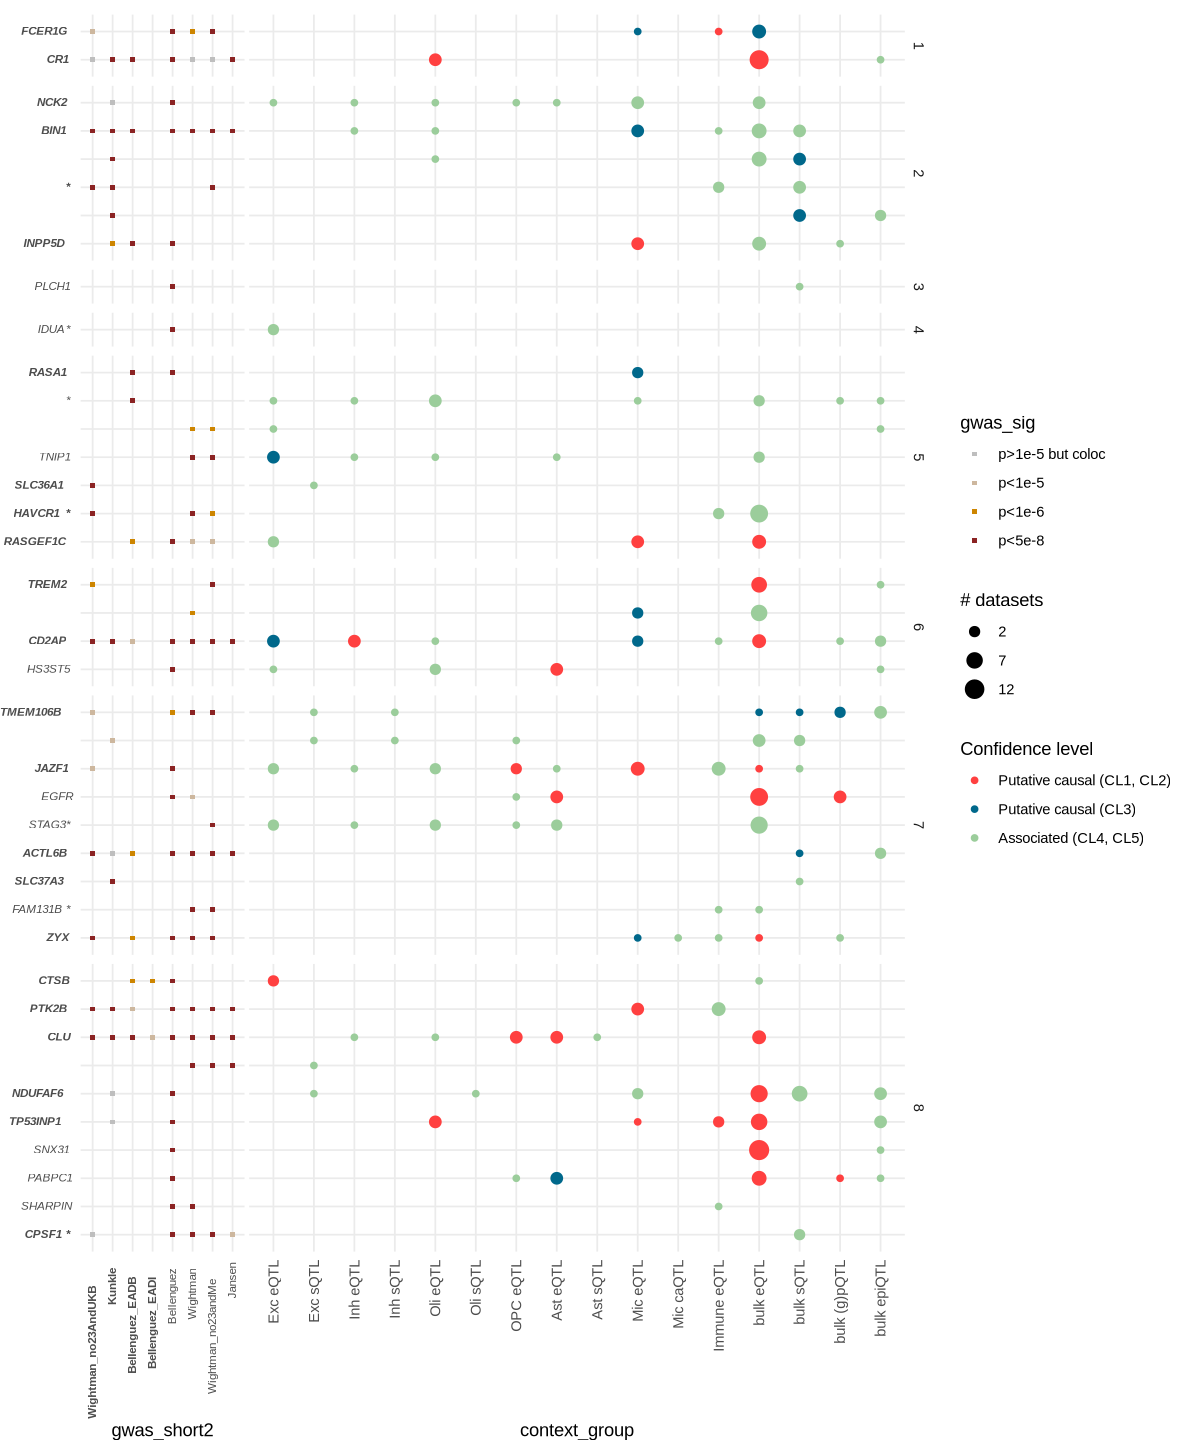

In [11]:
P1<-g1+p1+plot_layout(guides = 'collect',widths = c(1.5,6))&
   theme(plot.margin = margin(0, 0, 0, 0)) 

options(repr.plot.width = 10, repr.plot.height = 12)
P1

#### Plot (chr10-22)

In [12]:
p2<-ggplot(res_adxlocge_cont_topf[chr%in%10:22][!(APOE_region.gene)&(top_gene|top_confidence%in%c("CL1",'CL2','CL3'))])+
  geom_point(aes(y=locus_gene_3,x=context_group,
                 size=n_study_group.locus,
                 col=confidence_cat_group))+
  facet_grid(chr~'',scales = 'free',space = 'free')+
  scale_size(range = c(1.5,5),breaks = c(2,7,12))+theme_minimal()+
  scale_x_discrete(guide = guide_axis(angle = 90))+
  theme(strip.text.x = element_text(angle = 90))+
  labs(size='# datasets',col='Confidence level')+
  scale_color_manual(values = c('brown1','deepskyblue4','darkseagreen3'))+ 
  theme(strip.text.x = element_text(angle = 90),
        axis.text.y = element_blank(),
        axis.title.y = element_blank())+
  scale_y_discrete(labels=function(x) str_remove(x, "[A-Za-z0-9]+_[2-9]|_[0-9]+"))

g2<-ggplot(res_adxlocge_gwasf[chr%in%10:22])+
  geom_point(aes(y=locus_gene_3,x=gwas_short2,
                 col=gwas_sig),size=1,shape=15)+
  facet_grid(chr~'',scales = 'free',space = 'free')+
  # scale_size(range = c(0.5,2))+
  theme_minimal()+
  scale_x_discrete(guide = guide_axis(angle = 90))+
  scale_color_manual(values = c('grey','bisque3','orange3','brown4'))+
  theme(axis.text.x = element_markdown(size = 7),
        axis.text.y = element_markdown(size=7),axis.title.y =element_blank(),
        strip.text = element_blank(),   # remove facet text
        strip.background = element_blank() 
  )+
  scale_y_discrete(labels=function(x) str_remove(x, "[A-Za-z0-9]+_[2-9]|_[0-9]+"))


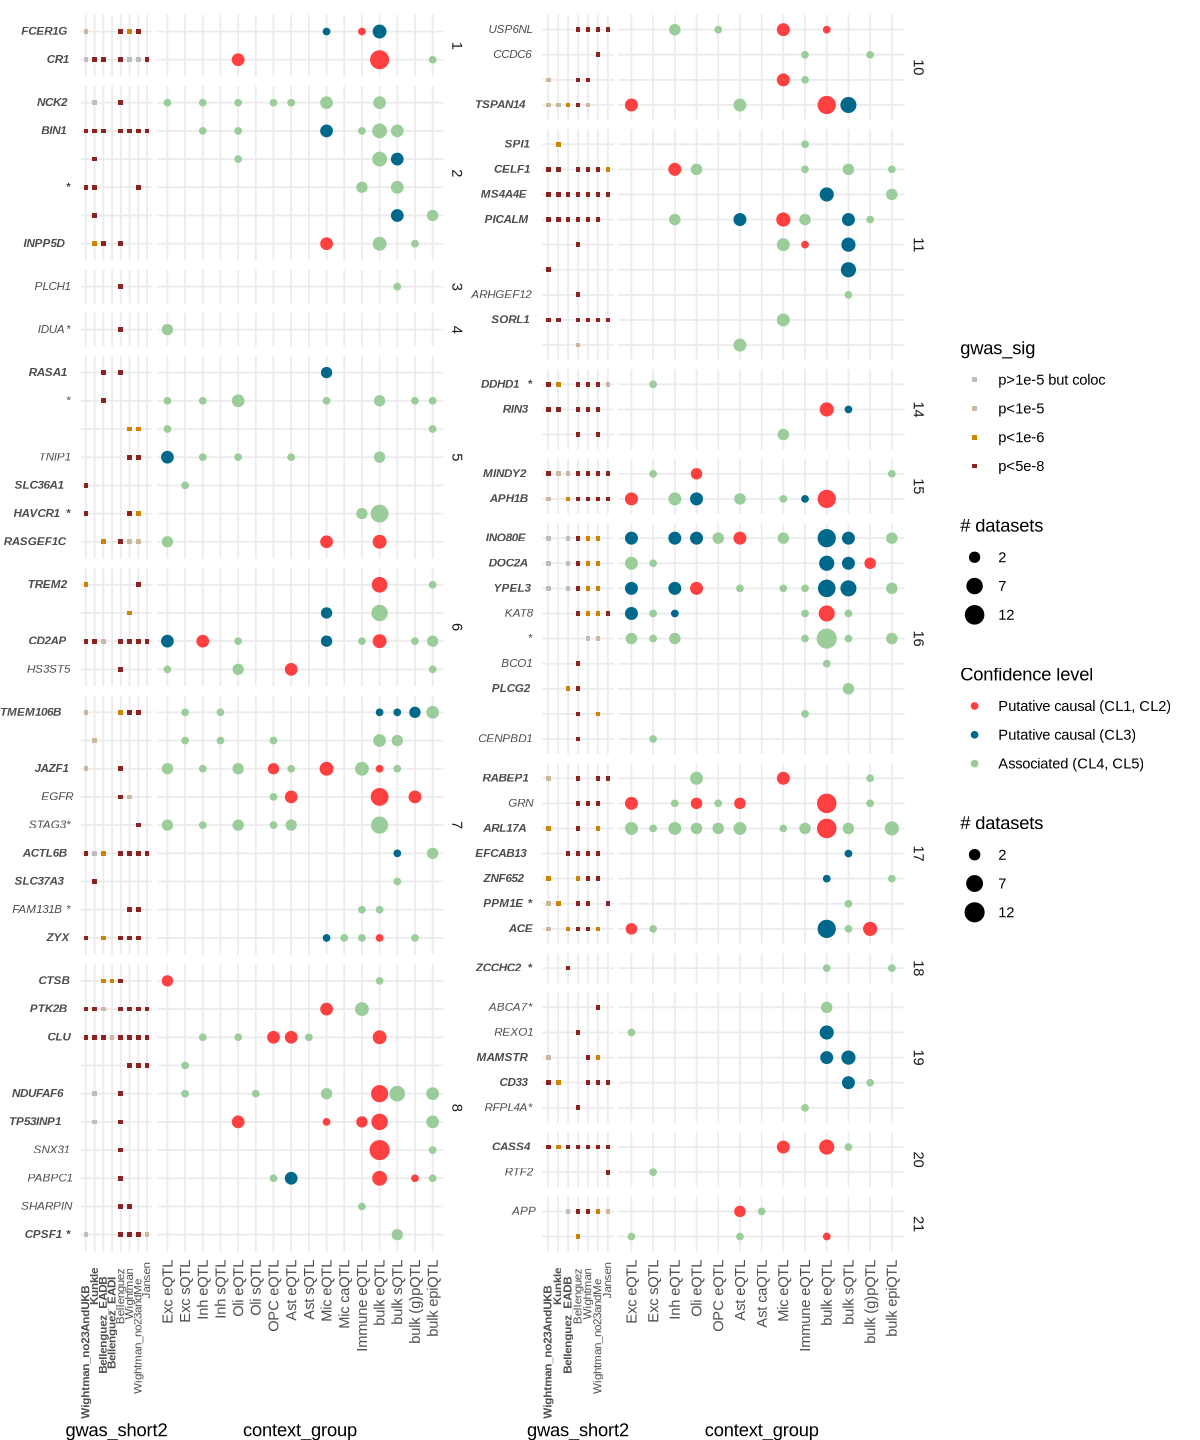

In [13]:
P2 <- g1+p1+g2+p2+plot_layout(guides = 'collect',widths = c(1.5,6,1.5,6))&
  theme(plot.margin = margin(0, 0, 0, 0)) 

options(repr.plot.width = 10, repr.plot.height = 12)
P2

#ggsave(fp(out,'ADloci_xQTL_summary_genome_wide_signif_top_gene_per_locus_3categories_gwas_plot_top_CL_genes_all_causal_top1_associated.pdf'),height = 9,width = 10)
#ggsave(fp(out,'ADloci_xQTL_summary_genome_wide_signif_top_gene_per_locus_3categories_gwas_plot_top_CL_genes_all_causal_top1_associated.png'),height = 9,width = 10)

### Suggestive signal
CL1 CL2 CL3 CL4 + more than 2 GWAS + at least 2 datasets in a similar context

In [14]:
res_adxlocgef<-res_adxlocge[!(genomewide_sig_gene)][gene_name%in%gene_name[confidence_lvl_group%in%c('CL1','CL2','CL3','CL4')&n_gwas_locus>2&n_study_group.locus>=2]]
res_adxlocge_cont_top2f<-unique(res_adxlocgef,by=c('gene_name','context_group','locus_index'))


#sep causal vs correlated 
#add if frpm, APOE region, from AD by proxy only, or from more than one locus

res_adxlocge_cont_top2f[,confidence_cat_group:=ifelse(confidence_lvl_group.locus%in%c('CL1',"CL2"),'Putative causal (CL1, CL2)',ifelse(confidence_lvl_group.locus=='CL3','Putative causal (CL3)','Associated'))]
res_adxlocge_cont_top2f[,confidence_cat_group:=factor(confidence_cat_group,levels = c('Putative causal (CL1, CL2)','Putative causal (CL3)','Associated (CL4, CL5)'))]



#annot genes
res_adxlocge_cont_top2f[,locus_gene_2:=paste(gene_name,match(locus_gene,
                                                            unique(locus_gene[order(chr,tss,min_pval)])),sep='_'),
                       by=.(gene_name)]

res_adxlocge_cont_top2f[,locus_gene_2:=paste0("<i>",locus_gene_2[1],'</i>'),
                       by='locus_gene']
#add asterisk if others genes in a CL4+ locus

res_adxlocge_cont_top2f[,n_gene_cl:=length(unique(gene_name)),by=c('locus_index','top_confidence')]
res_adxlocge_cont_top2f[,locus_gene_2:=paste0(locus_gene_2,ifelse(n_gene_cl>1&!top_confidence%in%c("CL1",'CL2','CL3'),
                                                                 '*','')),
                       by='locus_gene']
#add if from  AD by proxy only
res_adxlocge_cont_top2f[,locus_gene_2:=ifelse(!all(only_by_proxi,na.rm = T),paste0("<b>",locus_gene_2[1],'</b>'),
                                             locus_gene_2[1]),
                       by='locus_gene']

#order per gene tss and locus position
res_adxlocge_cont_top2f[,locus_gene_3:=factor(locus_gene_2,levels = unique(locus_gene_2[order(-chr,-tss,-as.numeric(str_extract(locus_gene_2,'_[0-9+]')|>str_remove('_')))]))]

#filter the gwas and annot with the gene too
res_adxlocge_gwas2f<-merge(res_adxlocge_gwas,unique(res_adxlocge_cont_top2f[!(APOE_region.gene)&(top_gene|top_confidence%in%c("CL1",'CL2','CL3'))][,.(locus_index,locus_gene_3,locus_gene)]),by='locus_index')


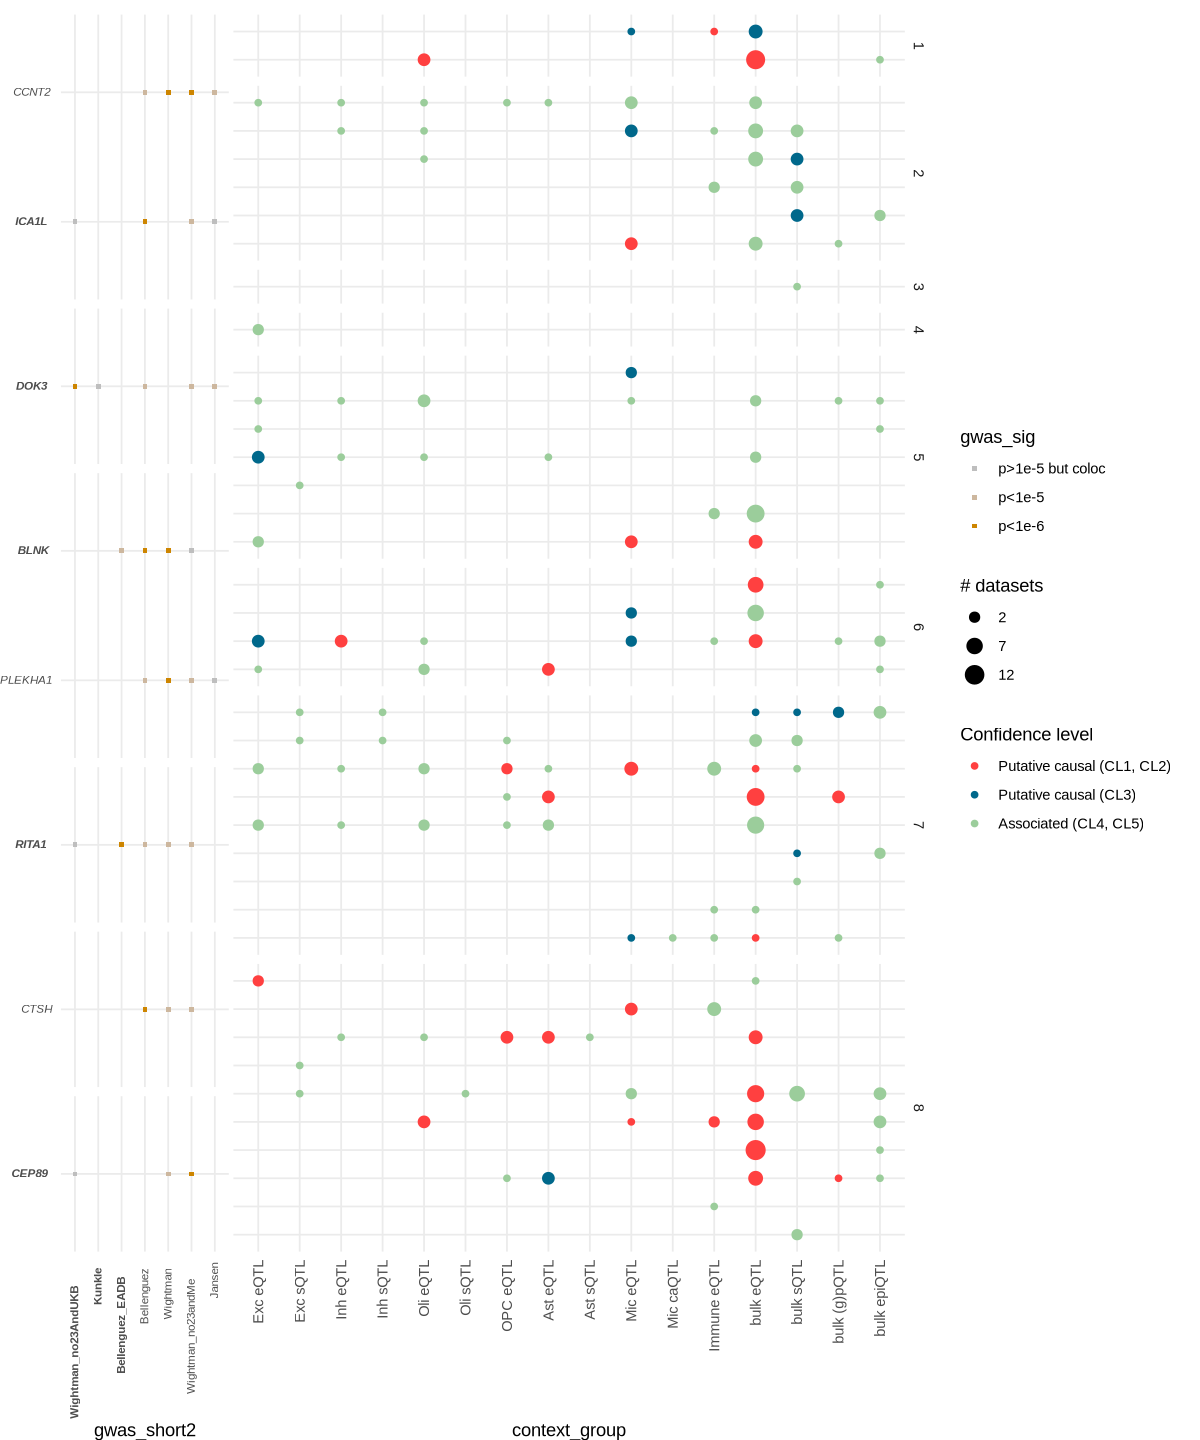

In [15]:
p3 <- ggplot(res_adxlocge_cont_top2f[!(APOE_region.gene)&(top_gene|top_confidence%in%c("CL1",'CL2','CL3'))])+
  geom_point(aes(y=locus_gene_3,x=context_group,
                 size=n_study_group.locus,
                 col=confidence_cat_group))+
  facet_grid(chr~'',scales = 'free',space = 'free')+
  scale_size(range = c(1.5,5),breaks = c(2,7,12))+theme_minimal()+
  scale_x_discrete(guide = guide_axis(angle = 90))+
  theme(strip.text.x = element_text(angle = 90))+
  labs(size='# datasets',col='Confidence level')+
  scale_color_manual(values = c('brown1','deepskyblue4','darkseagreen3'))+ 
  theme(strip.text.x = element_text(angle = 90),
        axis.text.y = element_blank(),
        axis.title.y = element_blank())+
  scale_y_discrete(labels=function(x) str_remove(x, "[A-Za-z0-9]+_[2-9]|_[0-9]+"))

g1 <- ggplot(res_adxlocge_gwas2f)+
  geom_point(aes(y=locus_gene_3,x=gwas_short2,
                 col=gwas_sig),size=1,shape=15)+
  facet_grid(chr~'',scales = 'free',space = 'free')+
  # scale_size(range = c(0.5,2))+
  theme_minimal()+
  scale_x_discrete(guide = guide_axis(angle = 90))+
  scale_color_manual(values = c('grey','bisque3','orange3','brown4'))+
  theme(axis.text.x = element_markdown(size = 7),
        axis.text.y = element_markdown(size=7),axis.title.y =element_blank(),
        strip.text = element_blank(),   # remove facet text
        strip.background = element_blank() 
  )+
  scale_y_discrete(labels=function(x) str_remove(x, "[A-Za-z0-9]+_[2-9]|_[0-9]+"))

P3 <- g1+p1+plot_layout(guides = 'collect',widths = c(1.5,6))&
  theme(plot.margin = margin(0, 0, 0, 0))

options(repr.plot.width = 10, repr.plot.height = 12)
P3

#ggsave(fp(out,'ADloci_xQTL_summary_suggestive_loci_top_gene_per_locus_3categories.png'),height = 5,width = 6)

In [16]:
setdiff(res_adxlocge_cont_top2f$gene_name,res_adxlocge_cont_topf$gene_name)

[1] "CCNT2"   "ICA1L"   "DOK3"    "BLNK"    "PLEKHA1" "RITA1"   "CTSH"   
[8] "CEP89"